In [1]:
from tensorflow.keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
import os
from google.colab import files
import zipfile
import random
from shutil import copyfile
from keras import optimizers
import tensorflow as tf

In [2]:
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

In [3]:
!ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [4]:
!mkdir /tmp/Dataset

mkdir: cannot create directory ‘/tmp/Dataset’: File exists


In [6]:
os.mkdir('/tmp/Dataset/train/')
os.mkdir('/tmp/Dataset/test/')

os.mkdir('/tmp/Dataset/train/daisy/')
os.mkdir('/tmp/Dataset/test/daisy/')
os.mkdir('/tmp/Dataset/train/dandelion/')
os.mkdir('/tmp/Dataset/test/dandelion')
os.mkdir('/tmp/Dataset/train/roses/')
os.mkdir('/tmp/Dataset/test/roses/')
os.mkdir('/tmp/Dataset/train/sunflowers/')
os.mkdir('/tmp/Dataset/test/sunflowers/')
os.mkdir('/tmp/Dataset/train/tulips/')
os.mkdir('/tmp/Dataset/test/tulips/')

FileExistsError: ignored

In [14]:
def split_data(SOURCE, TRAIN, TEST, SPLIT_SIZE):
  data=os.listdir(SOURCE)
  data_random=random.sample(data,len(data))
  train_size=int(len(data_random)*SPLIT_SIZE)
  for each_pic in data_random[:train_size]:
    if os.path.getsize(SOURCE+each_pic) !=0:
      copyfile(SOURCE+each_pic,TRAIN+each_pic)
  for each_pic in data_random[train_size:]:
    if os.path.getsize(SOURCE+each_pic) !=0:
      copyfile(SOURCE+each_pic,TEST+each_pic)

daisy='/root/.keras/datasets/flower_photos/daisy/'
dandelion='/root/.keras/datasets/flower_photos/dandelion/'
roses='/root/.keras/datasets/flower_photos/roses/'
sunflowers='/root/.keras/datasets/flower_photos/sunflowers/'
tulips='/root/.keras/datasets/flower_photos/tulips/'

sunflowers_train='/tmp/Dataset/train/sunflowers/'
sunflowers_test='/tmp/Dataset/test/sunflowers/'
daisy_train='/tmp/Dataset/train/daisy/'
daisy_test='/tmp/Dataset/test/daisy/'
dandelion_train='/tmp/Dataset/train/dandelion/'
dandelion_test='/tmp/Dataset/test/dandelion'
roses_train='/tmp/Dataset/train/roses/'
roses_test='/tmp/Dataset/test/roses/'
tulips_train='/tmp/Dataset/train/tulips/'
tulips_test='/tmp/Dataset/test/tulips/'

split_data(daisy,daisy_train,daisy_test,0.8)
split_data(dandelion,dandelion_train,dandelion_test,0.8)
split_data(roses,roses_train,roses_test,0.85)
split_data(sunflowers,sunflowers_train,sunflowers_test,0.8)
split_data(tulips,tulips_train,tulips_test,0.8)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory('/tmp/Dataset/train/',
                                            batch_size=50,
                                            target_size=(150,150),
                                            class_mode='categorical')
test_gen=test_datagen.flow_from_directory('/tmp/Dataset/test/',
                                          batch_size=50,
                                          target_size=(150,150),
                                          class_mode='categorical')

Found 3657 images belonging to 5 classes.
Found 1157 images belonging to 5 classes.


In [21]:
model=models.Sequential([
                          layers.Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu', padding='same' ),
                          layers.Conv2D(32, (3,3),  activation='relu', padding='same' ),
                          layers.MaxPool2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(20,activation='relu'),
                          layers.Dropout(0.5),
                          layers.Dense(5,activation='softmax')
                          ])

In [22]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 180000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                3600020   
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history=model.fit_generator(generator=train_gen,
                      steps_per_epoch=3118//50,
                      epochs=40,
                      validation_data=test_gen,
                      validation_steps=417//50)

Epoch 1/40
62/62 [==============================] - 24s 389ms/step - loss: 1.2429 - acc: 0.4790 - val_loss: 1.0333 - val_acc: 0.5675
Epoch 2/40
62/62 [==============================] - 24s 381ms/step - loss: 1.2262 - acc: 0.4923 - val_loss: 1.0280 - val_acc: 0.5275
Epoch 3/40
62/62 [==============================] - 24s 383ms/step - loss: 1.1927 - acc: 0.4926 - val_loss: 1.0549 - val_acc: 0.5200
Epoch 4/40
62/62 [==============================] - 24s 381ms/step - loss: 1.1809 - acc: 0.5155 - val_loss: 0.8844 - val_acc: 0.6125
Epoch 5/40
52/62 [========================>.....] - ETA: 3s - loss: 1.1701 - acc: 0.5084

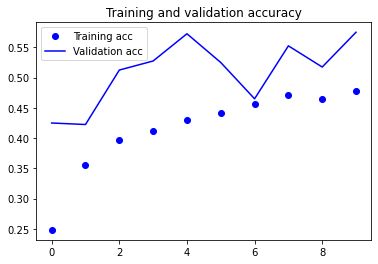

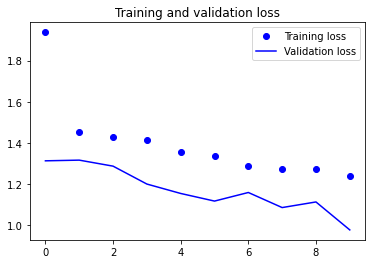

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()